## 04-1 로지스틱 회귀

---
layout: single
title:  "CHAPTER 04"
categories: AI
---

In [1]:
# k-최근접 이웃 분류기로 럭키백에 들어간 생선의 확률 계산하기
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# Species 고유값 추출
print('Species 고유값 추출 :',pd.unique(fish['Species']))

Species 고유값 추출 : ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# Species열을 뺀 나머지를 입력데이터로 지정
# 데이터프레임 > numpy 배열로 전환
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print('fish_input Data\n',fish_input[:5])

fish_target = fish['Species'].to_numpy()
print('fish_target Data\n',fish_target[:5])

fish_input Data
 [[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
fish_target Data
 ['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [4]:
# 분류한 fish데이터를 train 세트와 test세트로 분류

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

In [5]:
# 표준화 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print('train_input \n',train_input)
print('test_input \n',test_input)

print('train_scaled \n',train_scaled)
print('test_scaled \n',test_scaled)

train_input 
 [[7.20000e+02 3.50000e+01 4.06000e+01 1.63618e+01 6.09000e+00]
 [5.00000e+02 4.50000e+01 4.80000e+01 6.96000e+00 4.89600e+00]
 [7.50000e+00 1.05000e+01 1.16000e+01 1.97200e+00 1.16000e+00]
 [1.10000e+02 2.20000e+01 2.35000e+01 5.52250e+00 3.99500e+00]
 [1.40000e+02 2.07000e+01 2.32000e+01 8.53760e+00 3.29440e+00]
 [6.90000e+01 1.82000e+01 2.03000e+01 5.29830e+00 2.82170e+00]
 [1.10000e+02 2.10000e+01 2.25000e+01 5.69250e+00 3.55500e+00]
 [6.20000e+02 3.45000e+01 3.97000e+01 1.55227e+01 5.28010e+00]
 [1.30000e+02 2.13000e+01 2.28000e+01 6.38400e+00 3.53400e+00]
 [8.50000e+01 2.00000e+01 2.10000e+01 5.08200e+00 2.77200e+00]
 [6.85000e+02 3.65000e+01 3.90000e+01 1.08810e+01 6.86400e+00]
 [5.00000e+02 3.10000e+01 3.62000e+01 1.43714e+01 4.81460e+00]
 [5.14000e+02 3.28000e+01 3.40000e+01 1.00300e+01 6.01800e+00]
 [2.00000e+02 2.30000e+01 2.58000e+01 1.03458e+01 3.66360e+00]
 [1.00000e+03 4.40000e+01 4.66000e+01 1.24888e+01 7.59580e+00]
 [7.14000e+02 3.60000e+01 4.15000e+01 1.6

In [6]:
# k-최근접 이웃 분류기의 확률 예측

from sklearn.neighbors import KNeighborsClassifier
# 이웃 수 : count
count = 3
kn = KNeighborsClassifier(n_neighbors=count)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [7]:
print('target값 확인 \n',kn.classes_)

print(test_scaled[:5])
print('5개 샘플 target값 예측 \n',kn.predict(test_scaled[:5]))

target값 확인 
 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]
5개 샘플 target값 예측 
 ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [8]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_,'\n',np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 
 [[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [9]:
# 네 번째 샘플의 최근접 이웃의 클래스 확인
 
distances, indexes = kn.kneighbors(test_scaled[3:4])
print('네 번째 샘플과 가장 이웃한 '+str(count)+'개의 클래스 :',train_target[indexes])

네 번째 샘플과 가장 이웃한 3개의 클래스 : [['Roach' 'Perch' 'Perch']]


# 로지스틱 회귀

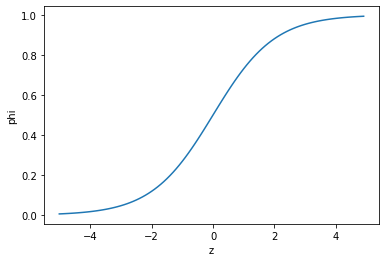

In [10]:
# 시그모이드 함수 그리기

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [11]:
# %불리언 인덱싱으로 A,C만 골라내기

char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [12]:
# 불리언 인덱싱을 이용하여 Bream과 Smelt행만 골라내기

bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt= train_target[bream_smelt_indexes]

In [13]:
# 로지스틱회귀모델 훈련

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 5개 샘플 예측
print('5개 샘플 예측 :',lr.predict(train_bream_smelt[:5]))
print('예측확률 출력 \n',lr.predict_proba(train_bream_smelt[:5]))
print('Bream과 Smelt중 양성클래스 확인 \n',lr.classes_)
print('계수 확인 : ', lr.coef_, lr.intercept_)
print('샘플 5개 z값 계산 \n',lr.decision_function(train_bream_smelt[:5]))
from scipy.special import expit
print('decisions 배열 확률로 변환 \n',expit(lr.decision_function(train_bream_smelt[:5])))

5개 샘플 예측 : ['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
예측확률 출력 
 [[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
Bream과 Smelt중 양성클래스 확인 
 ['Bream' 'Smelt']
계수 확인 :  [[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
샘플 5개 z값 계산 
 [-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
decisions 배열 확률로 변환 
 [0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [14]:
# 로지스틱 회귀로 다중 분류 수행하기

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
proba = lr.predict_proba(test_scaled[:5])
print('5개 샘플 예측 :',proba)
print('예측확률 출력 \n',np.round(lr.predict_proba(test_scaled[:5]),decimals=3))
print('클래스 정보 확인 \n',lr.classes_)
print('계수 확인 : ', lr.coef_.shape, lr.intercept_.shape)

0.9327731092436975
0.925
5개 샘플 예측 : [[7.25010796e-06 1.35122184e-02 8.41272802e-01 3.14325774e-04
  1.35670201e-01 6.67127088e-03 2.55193226e-03]
 [7.15127184e-09 2.55606529e-03 4.39087352e-02 3.38007666e-05
  7.31090852e-03 9.46185227e-01 5.25572694e-06]
 [1.86559646e-05 2.79662360e-06 3.40600104e-02 9.34804501e-01
  1.50475962e-02 1.60367775e-02 2.96619098e-05]
 [1.09326228e-02 3.40498583e-02 3.05543975e-01 6.60910568e-03
  5.66576740e-01 6.87256768e-05 7.62189727e-02]
 [4.48995860e-06 3.67292847e-04 9.04002342e-01 2.41273299e-03
  8.94746237e-02 2.40966002e-03 1.32885887e-03]]
예측확률 출력 
 [[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
클래스 정보 확인 
 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
계수 확인 :  (7, 5) (7,)


In [15]:
# 소프트맥스 함수

print('클래스 정보 확인 \n',lr.classes_)
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

클래스 정보 확인 
 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 04-2 확률적 경사 하강법

In [16]:
#PANDAS 데이터 프레임 만들기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [17]:
# Species 열을 제외한 나머지 5개를 입력데이터로 사용
# Species 열은 타겟 데이터로 사용
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [18]:
# 훈련세트 테스트세트 지정
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

In [19]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print('train_scaled : ',train_scaled)
print('test_scaled : ',test_scaled)

train_scaled :  [[ 9.19657820e-01  6.09431747e-01  8.10412209e-01  1.85194896e+00
   1.00075672e+00]
 [ 3.00412188e-01  1.54653445e+00  1.45316551e+00 -4.69816625e-01
   2.72917446e-01]
 [-1.08585360e+00 -1.68646987e+00 -1.70848587e+00 -1.70159849e+00
  -2.00447580e+00]
 [-7.97341433e-01 -6.08801762e-01 -6.74869070e-01 -8.24805885e-01
  -2.76314705e-01]
 [-7.12898847e-01 -7.30625113e-01 -7.00926637e-01 -8.02298036e-02
  -7.03386897e-01]
 [-9.12746301e-01 -9.64900787e-01 -9.52816444e-01 -8.80171862e-01
  -9.91535662e-01]
 [-7.97341433e-01 -7.02512032e-01 -7.61727625e-01 -7.82824547e-01
  -5.44530184e-01]
 [ 6.38182533e-01  5.62576612e-01  7.32239510e-01  1.64473401e+00
   5.07057367e-01]
 [-7.41046376e-01 -6.74398951e-01 -7.35670058e-01 -6.12059278e-01
  -5.57331377e-01]
 [-8.67710255e-01 -7.96222301e-01 -8.92015456e-01 -9.33586942e-01
  -1.02183182e+00]
 [ 8.21141469e-01  7.49997152e-01  6.71438522e-01  4.98470601e-01
   1.47257213e+00]
 [ 3.00412188e-01  2.34590667e-01  4.28234570e-01

In [20]:
#경사하강법 분류 클래스 import
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Python\Python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [21]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [22]:
# 그래프를 그리기 위한 사전작업

import numpy as np

sc = SGDClassifier(loss = 'log', random_state= 42)
train_score = []
test_score = []
classes = np.unique(train_target)   #생선데이터 목록
print('생선데이터 목록 : ', classes)

# 1에포크가 증가할때마다 train_score, test_score에 점수 추가
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

생선데이터 목록 :  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


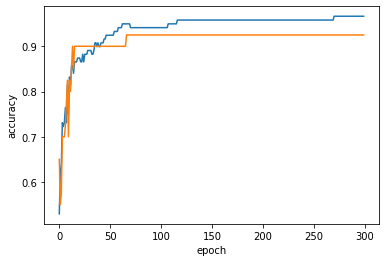

In [23]:
#그래프 그리기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [24]:
# SGDClassifier의 반복횟수를 100에 맞추고 다시 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [25]:
# hinge손실을 이용한 모델 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
